<a href="https://colab.research.google.com/github/jobcito/Repositorio-de-JOB/blob/master/Lab_1_Cargando_pesos_para_red_en_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Feed Forward en Keras

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
# Una red feed forward en keras se puede crear con keras.Sequential

red_de_prueba = keras.Sequential()

# Por ahora nuestra red está vacía

In [ ]:
# Se pueden agregar capas con el método .add
# Por ahora usaremos capas densas, que se crean con keras.layers.Dense
# Una capa dense está definida por la cantidad de neuronas y la
# función de activación. También se le puede asignar un nombre.
#
# El siguiente código agrega dos capas:
# - una primera capa con 30 neuronas y activación sigmoid
# - una segunnda capa con 20 neuronas y activación relu
#
# Nota que a la primera capa debes decirle el tamaño de la entrada
# Estamos suponiendo que la entrada es de tamaño 40.

red_de_prueba = keras.Sequential()

red_de_prueba.add(
    keras.layers.Dense(30, input_dim=40, activation='sigmoid', 
                       name='primera_capa')
)

red_de_prueba.add(
    keras.layers.Dense(20, activation='relu', name='segunda_capa')
)

# Se puede ver un resumen de la red hasta ahora con .summary 

red_de_prueba.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera_capa (Dense)         (None, 30)                1230      
_________________________________________________________________
segunda_capa (Dense)         (None, 20)                620       
Total params: 1,850
Trainable params: 1,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Podemos agregar otra capa sobre las anteriores
# La capa también se puede crear en una variable y luego usarla

red_de_prueba.add(keras.layers.Dense(1, activation='sigmoid', name='ultima'))

# Nuestra red debiera tener ahora 3 capas
red_de_prueba.summary()

## Ejercicio 1
Crea una red de nombre `red` con 3 capas escondidas con las siguientes dimensiones  (el primer numero es el tamaño del input, el ultimo el tamaño del output):

30 --> 20 --> 10 --> 20 --> 4

y con activaciones `'relu'`, `'sigmoid'`, `'relu'`, `'softmax'`. Ponle nombres "primera", "segunda", "tercera" y "final" a las capas de tu red. Tu código debiera comenzar con  `red = keras.Sequential()`. 

Al terminar tu código y ejecutar `red.summary()` debieras ver un texto como el siguiente:

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
primera (Dense)              (None, 20)                620       
_________________________________________________________________
segunda (Dense)              (None, 10)                210       
_________________________________________________________________
tercera (Dense)              (None, 20)                220       
_________________________________________________________________
final (Dense)                (None, 4)                 84        
=================================================================
Total params: 1,134
Trainable params: 1,134
Non-trainable params: 0
_________________________________________________________________
```

In [ ]:
# Acá empieza tu código (~5 líneas)

red = keras.Sequential()

# Acá termina tu código

red.summary()

## Ejercicio 2

Una red sin pesos no puede hacer nada realmente. En este ejercicio agregaremos pesos al azar a cada capa de la red. Más adelante agregaremos pesos con sentido.

In [ ]:
import numpy as np
np.random.seed(30) # esto es para que el proceso sea repetible

In [ ]:
# La primera capa es de dimensiones 30x20 con un bias de tamaño 20.
# El sigueinte código crea matrices de pesos y bias para la primera
# capa de nuestra red anterior

W1 = np.random.randn(30,20).astype('float32')
b1 = np.random.randn(20).astype('float32')

In [ ]:
# Con este código podemos setear los pesos directamente en la primera capa

red.get_layer('primera').set_weights((W1,b1))

In [ ]:
# podemos ver que los pesos sean efectivamente los mismos haciendo esto

(W,b) = red.get_layer('primera').get_weights()
print(W[10][10], W1[10][10])

Crea pesos y bias para todas las capas que restan (segunda, tercera, y final). Ponle los siguientes nombres a los pesos y bias: `W2`, `b2`, `W3`, `b3`, `U`,  y `c`.

Al terminar tu código (si ejecutas todo bien desde el `np.random.seed(30)`), al ejecutar esta línea de código 

```
print(red.get_layer('final').get_weights()[0][0,3])
```

debieras obtener el valor `0.689416`.



In [ ]:
# Genera los nuevos pesos y bias
# Acá empieza tu código (~6 líneas)


# Acá termina tu código

In [ ]:
# Ahora asigna los pesos a cada capa
# Acá empieza tu código (~3 líneas)


# Acá termina tu código

# Pro-tip: puedes referirte a una capa por su índice
# usando red.layers[i].

In [ ]:
# Si todo anduvo bien, el valor de la variable impresa abajo
# debiera ser 0.689416 (no olvides ejecutar todo el código desde 
# que se asigna la semilla).

print(red.get_layer('final').get_weights()[0][0,3])

## Ejercicio 3: Pasada hacia adelante por la red

Una vez creada la red y los pesos, se puede usar la red completa para pasar un conjunto de datos completo por ella, también llamado "predicción". Para esto crearemos conjuntos de datos aleatorios.

In [ ]:
# Primero creamos datos de entrada (también random).
# Crearemos M=1000 casos

np.random.seed(30)
M = 1000
X = np.random.randn(M,30)

In [ ]:
# Para seleccionar los datos desde la posición i a la j hacemos X[i:j+1]
# Lo siguiente muestra los ejemplos de las posiciones 30, 31 y 32

print(X[30:33])

[[ 0.02774178  0.4898778   0.42023164 -0.28935611  0.03058479  0.43415183
   1.99952698  0.43156425 -0.99050523 -0.05710909  1.10122304  1.29250437
   0.54052745  1.25239432  1.02688276 -0.10774856  0.12366795  1.00560067
  -0.59393001 -0.07775604  0.63217615  0.90495627  0.68279093 -1.68561859
  -0.77282981  0.41267801  0.14633539 -0.29860478 -0.27525187  0.44420499]
 [-0.67035023  0.49450513  2.55843712  2.19707903  0.16479335  0.75229629
   0.71596993 -1.28622365  0.37660482 -1.09513919 -0.20031038 -1.1451353
  -0.39797647 -0.71142084 -1.80980539  1.05754653  0.03537652  1.17215615
  -0.47500267 -0.09322557  0.10460944 -0.59988213 -0.875007   -1.26971285
   0.51133401 -0.37615699  1.51819677  0.25781382  0.36449487 -0.10589305]
 [-1.18845366  0.53925576  3.15520268  0.71549632  0.58096965  0.19820515
  -0.95753055 -1.11376489  1.09200004  1.6566401   0.48958599  0.44022759
   1.34185802 -0.77255487 -1.52307972  0.92506015  1.15050752 -0.46007198
   1.50099056  0.40347495  0.38191204

In [ ]:
# Para predecir con la red, simplemente usamos red.predict() y le pasamos
# todos los ejemplos para los que queremos que haga una predicción.
# Lo siguiente genera la predicción para los ejemplos 30, 31 y 32.
# Nota que el resultado es un arreglo/matriz de 3x4 (note el uso de shape)

Pred = red.predict(X[30:33])
print(Pred)
print('tamaño:', Pred.shape)

Calcula la pasada hacia adelante (predicción) para los ejemplos desde el 890 al 903, ambos inclusive, y guardalos en la variable `Pred`.

Luego imprime el valor `Pred[12,2]` y debiera darte el valor `0.9982584`

In [ ]:
# Acá empieza tu código (~2 líneas)

# Acá termina tu código

## Ejercicio 4: Predicciones como probabilidades

Cuando la red se usa con `softmax` en la última activación genera probabilidades que indican la probabilidad de predicción en cada clase. Para determinar la predicción en cada caso, podemos usar `np.argmax`, que calcula el índice del valor máximo en la predicción.

In [ ]:
# Calculemos primero la predicción para los inputs en el rango 0:5

Pred = red.predict(X[0:5])
print(Pred)
print(Pred.shape)

In [ ]:
# np.argmax entrega el índice de la posición de mayor valor.
# Con axis=1, le decimos que el máximo se debe calcular en cada "fila"

clases = np.argmax(Pred, axis=1)
print(clases)
print(clases.shape)

Calcula la clase que la red predice para los ejemplos en los índices 199, 549, y 997. Tus resultados debieran ser 2, 0 y 1, respectivamente.

In [ ]:
# Acá empieza tu código (~5 líneas)

# Acá termina tu código

# Red para MNIST

Ahora construiremos una red para un problema real de detección de números escritos a mano. No entrenaremos la red si no que cargaremos pesos directamente y la usaremos para hacer predicciónes. 

Vamos a partir cargando datos desde `keras.datasets.mnist`.

In [ ]:
# Carga datos de MNIST (solo cargaremos un conjunto de pruebas).
# Nota el tamaño de los datos

_, (imgs, labs) = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

(10000, 28, 28)
(10000,)


etiqueta: 7


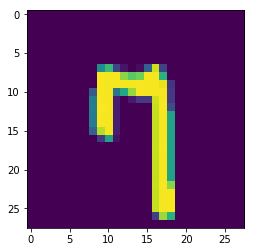

In [ ]:
# Podemos visualizar una imagen cualquiera 
# (si ejecutas esta celda cambiando 'd' puedes ver una distinta)

from matplotlib import pyplot as plt
d = 80
print('etiqueta:',labs[d])
plt.imshow(imgs[d])

Lo primero que debes notar es que los inputs tienen forma de (10000, 28, 28) lo que será  un problema para cualquier red que hagamos. Por lo que cambiaremos su forma y lo dejaremos todo en una matriz de 10000 x (28*28), esto lo hacemos con el comando `reshape`.

In [ ]:
X = imgs.reshape(10000,28*28)
print(X.shape)

(10000, 784)


Lo siguiente que haremos será "normalizar" los valores de entrada, de manera tal que todos estén entre 0 y 1. Más adelante veremos que este paso resulta demasiado importante en el buen funcionamiento de las redes. Las imágenes son valores de intensidad de un pixel de entre 0 y 255. Para normalizarlos simplemente dividimos todos los datos por 255.

In [ ]:
# Dividimos por 255
X = X / 255

##  Descripción de la  red para MNIST


En esta parte, usaremos pesos y bias preconstruidos para crear una red que predice (con alta certeza) la etiqueta de imágenes de números escritos a mano en imágenes de 28x28 pixeles. La red tiene esta arquitectura:

784 --> 32 (relu) --> 16 (relu) --> 10 (softmax)

Tu trabajo será crear la red con esa arquitectura usando `keras.Sequential` y `keras.layers.Dense`, usar las funciones de activación correspondientes, cargar los pesos y bias en cada una  de las capas, y luego probar la red haciendo predicciones para ciertos ejemplos.

** Este ejercicio es considerablemente más largo que los anteriores **

## Paso 0: Construyendo las matrices de pesos

Carga los pesos y bias  de la red. Los archivos son tales que `W1.txt` y `b1.txt`  corresponden al a primera capa, `W2.txt` y `b2.txt` a la segunda,  y `U` y `c` a la capa final.

In [ ]:
# Con el siguiente código puedes descargar los pesos
# y descomprímelos en la carpeta mnist_weights.

!wget -q dcc.uchile.cl/~jperez/cursos/cc66h/mnist_weights.tar.gz -o /dev/null
!tar -zxvf mnist_weights.tar.gz

mnist_weights/
mnist_weights/c.txt
mnist_weights/W1.txt
mnist_weights/b1.txt
mnist_weights/b2.txt
mnist_weights/U.txt
mnist_weights/W2.txt


In [ ]:
import numpy as np

In [ ]:
# Para cargar datos desde archivos en arreglos numpy
# puedes usar np.loadtxt

W1 = np.loadtxt('mnist_weights/W1.txt')
b1 = np.loadtxt('mnist_weights/b1.txt')

In [ ]:
# Carga tu los datos en las variables W2, b2, U, y c

# Acá empieza tu código (~4 lineas)


# Acá termina tu código

# Si todo funciona bien, lo siguiente debiera imprimir los valores
# -0.14337286353111267
# 0.06190946325659752
# 0.10503328591585159
# 0.12370651960372925

print(W2[5][7])
print(b2[10])
print(U[6][8])
print(c[5])

## Paso 1: Creando la  red

Crea la red. Llámale simplemente `red`.


In [ ]:
# Acá empieza tu código (~5 líneas)


# Acá termina tu código

## Paso 2: Carga los pesos

Carga los pesos en cada una de las capas  (según lo que aprendiste antes)

In [ ]:
# Acá empieza tu código (~3 líneas)


# Acá termina tu código

In [ ]:
# Si cargaste todo correctamente, lo siguiente debiera dar el valor 0.96696055

test_in = np.ones((1,28*28)).astype('float32')
test_out = red.predict(test_in)
print(test_out[0][7])

## Paso 3: Probabiilidades de predicción

Primero imprime la imágen en el índice 195, y luego,  con tu red cargada calcula las probabilidades para cada clase para la imagen en el índice 195. ¿Cuáles son las dos clases más probables para este ejemplo?

In [ ]:
# Primero imprimimos
plt.imshow(imgs[195])

In [ ]:
# Ahora calcula las probabilidades para cada clase. 
# Acá empieza tu código (~2 líneas)


# Acá termina tu código
# Cuáles son las más altas?

## Paso 4: Prediciendo Clases

Usa lo que has aprendido antes (en particular la función `np.argmax`) para hacer un trozo de código que, dada una variable que representa un índice entre 0 y 9999, muestre la imagen asociada a ese índice, la etiqueta real de la imagen, la etiqueta predicha por la red. La celda debería generar un output de la siguiente forma

```
etiqueta real: <valor1>
predicción: <valor2>
<imagen>
```

Opcional: si sabes un poco más de python, trata de hacer una función que reciba el índice como input y entregue lo pedido. 

In [ ]:
# Acá empieza tu código (~5 líneas)



# Acá termina tu código

## Paso 5: Opcional

Haz un trozo de código que calcule cuántas predicciones de la red fueron correctas y cuántas fueron incorrectas, y use esos números para computar un porcentaje de acierto de la red. 

Opcional: si sabes algo de numpy, intenta hacer todo el proceso sin hacer iteraciones (de hecho, podrías tratar de hacerlo con y sin iteraciones y luego comprobar cuál es la ganancia en tiempo de hacerlo sin usar una iteración).

In [ ]:
# Acá empieza tu código (~5 líneas)



# Acá termina tu código